<a href="https://colab.research.google.com/github/Angy-face/Esan-Coding-SS2/blob/main/Usecase_TrendingYouTube_K_Mean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Trending YouTube Video Statistics


1. เก็บและรวบรวมข้อมูลดิบ เลือกข้อมูลจากแหล่ง kaggle.com โจทย์คือข้อมูลเกี่ยวการสถิติการเข้าชม YouTube เลื่อกเฉพาะ GB และ US

In [38]:
import numpy as np
import pandas as pd
import json
df_US = pd.read_csv('/content/USvideos.csv', sep=",")
df_GB = pd.read_csv('/content/GBvideos.csv', sep=",")
df_json_US = pd.read_json('/content/US_category_id.json', orient='columns')
df_json_GB = pd.read_json('/content/GB_category_id.json', orient='columns')

In [39]:
df_US

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...


In [40]:
df_US['Country'] = 'US'
df_GB['Country'] = 'GB'

In [41]:
df_US['category_id'] = df_US['category_id'].astype(str)

category_id = {}

with open('/content/US_category_id.json', 'r') as f:
    data = json.load(f)
    for category in data['items']:
        category_id[category['id']] = category['snippet']['title']

df_US.insert(4, 'category', df_US['category_id'].map(category_id))
category_list_US = df_US['category'].unique()
category_list_US

array(['People & Blogs', 'Entertainment', 'Comedy',
       'Science & Technology', 'Film & Animation', 'News & Politics',
       'Sports', 'Music', 'Pets & Animals', 'Education', 'Howto & Style',
       'Autos & Vehicles', 'Travel & Events', 'Gaming',
       'Nonprofits & Activism', 'Shows'], dtype=object)

In [42]:
df_GB['category_id'] = df_GB['category_id'].astype(str)

category_id = {}

with open('/content/GB_category_id.json', 'r') as f:
    data = json.load(f)
    for category in data['items']:
        category_id[category['id']] = category['snippet']['title']

df_GB.insert(4, 'category', df_GB['category_id'].map(category_id))
category_list_GB = df_GB['category'].unique()
category_list_GB

array(['Howto & Style', 'Entertainment', 'Music', 'Sports',
       'News & Politics', 'People & Blogs', 'Comedy',
       'Science & Technology', 'Pets & Animals', 'Education',
       'Film & Animation', 'Gaming', 'Autos & Vehicles',
       'Travel & Events', nan, 'Shows'], dtype=object)

In [43]:
df_US

,video_id,trending_date,title,channel_title,category,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Country
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,US
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,Entertainment,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",US
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,US
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,Entertainment,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,US
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,Entertainment,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,Pets & Animals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals,US
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,People & Blogs,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN,US
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,Entertainment,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...,US
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,Film & Animation,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...,US


In [44]:
df_all = pd.concat([df_US,df_GB], axis=0)

In [45]:
df_all['trending_date'] = pd.to_datetime(df_all['trending_date'], errors='coerce', format='%y.%d.%m')
df_all['publish_time'] = pd.to_datetime(df_all['publish_time'], errors='coerce', format='%Y-%m-%dT%H:%M:%S.%fZ')

สำรวจข้อมูลดิบคร่าวๆ ว่าเพียงพอไหม มี missing value หรือเปล่า
1. มี Feature อะไรบ้าง
2. มีกี่แถว กี่คอร์ลัมภํ
3. ดูตัวอย่างข้อมูลแต่ละคอร์ลัมภ์
4. แต่ละ Feature มีข้อมูลอะไรบ้าง

In [46]:
df_all.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category',
       'category_id', 'publish_time', 'tags', 'views', 'likes', 'dislikes',
       'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'video_error_or_removed', 'description', 'Country'],
      dtype='object')

In [47]:
df_all.shape

(79865, 18)

In [48]:
df_all.tail(5)

,video_id,trending_date,title,channel_title,category,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Country
38911,l884wKofd54,2018-06-14,Enrique Iglesias - MOVE TO MIAMI (Official Vid...,EnriqueIglesiasVEVO,Music,10,2018-05-09 07:00:01,"Enrique Iglesias feat. Pitbull|""MOVE TO MIAMI""...",25066952,268088,12783,9933,https://i.ytimg.com/vi/l884wKofd54/default.jpg,False,False,False,NEW SONG - MOVE TO MIAMI feat. Pitbull (Click ...,GB
38912,IP8k2xkhOdI,2018-06-14,Jacob Sartorius - Up With It (Official Music V...,Jacob Sartorius,Music,10,2018-05-11 17:09:16,"jacob sartorius|""jacob""|""up with it""|""jacob sa...",1492219,61998,13781,24330,https://i.ytimg.com/vi/IP8k2xkhOdI/default.jpg,False,False,False,THE OFFICIAL UP WITH IT MUSIC VIDEO!Get my new...,GB
38913,Il-an3K9pjg,2018-06-14,Anne-Marie - 2002 [Official Video],Anne-Marie,Music,10,2018-05-08 11:05:08,"anne|""marie""|""anne-marie""|""2002""|""two thousand...",29641412,394830,8892,19988,https://i.ytimg.com/vi/Il-an3K9pjg/default.jpg,False,False,False,Get 2002 by Anne-Marie HERE ▶ http://ad.gt/200...,GB
38914,-DRsfNObKIQ,2018-06-14,Eleni Foureira - Fuego - Cyprus - LIVE - First...,Eurovision Song Contest,Entertainment,24,2018-05-08 20:32:32,"Eurovision Song Contest|""2018""|""Lisbon""|""Cypru...",14317515,151870,45875,26766,https://i.ytimg.com/vi/-DRsfNObKIQ/default.jpg,False,False,False,Eleni Foureira represented Cyprus at the first...,GB
38915,4YFo4bdMO8Q,2018-06-14,KYLE - Ikuyo feat. 2 Chainz & Sophia Black [A...,SuperDuperKyle,Music,10,2018-05-11 04:06:35,"Kyle|""SuperDuperKyle""|""Ikuyo""|""2 Chainz""|""Soph...",607552,18271,274,1423,https://i.ytimg.com/vi/4YFo4bdMO8Q/default.jpg,False,False,False,Debut album 'Light of Mine' out now: http://ky...,GB


In [49]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79865 entries, 0 to 38915
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                79865 non-null  object        
 1   trending_date           79865 non-null  datetime64[ns]
 2   title                   79865 non-null  object        
 3   channel_title           79865 non-null  object        
 4   category                79775 non-null  object        
 5   category_id             79865 non-null  object        
 6   publish_time            79865 non-null  datetime64[ns]
 7   tags                    79865 non-null  object        
 8   views                   79865 non-null  int64         
 9   likes                   79865 non-null  int64         
 10  dislikes                79865 non-null  int64         
 11  comment_count           79865 non-null  int64         
 12  thumbnail_link          79865 non-null  object     

ตรวจข้อมูลว่ามีค่า missing value หรือไม่

In [50]:
df_all.isnull().sum()

,0
video_id,0
trending_date,0
title,0
channel_title,0
category,90
category_id,0
publish_time,0
tags,0
views,0
likes,0


เนื่องจากเป็นค่าจริง replace ค่า description ด้วย - แต่จะนำค่าอื่นๆ ไปวิเคราะห์ต่อ

และจะ clean ข้อมูล Category ด้วยการตัดออก

In [51]:
df_all.description.fillna(value='-', inplace=True)

<ipython-input-51-bf02db4895b9>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_all.description.fillna(value='-', inplace=True)


In [52]:
df_all.isnull().sum()

,0
video_id,0
trending_date,0
title,0
channel_title,0
category,90
category_id,0
publish_time,0
tags,0
views,0
likes,0


In [53]:
df_all.dropna(subset=['category'], inplace=True)

In [54]:
df_all.isnull().sum()

,0
video_id,0
trending_date,0
title,0
channel_title,0
category,0
category_id,0
publish_time,0
tags,0
views,0
likes,0


2. ตั้งคำถาม และสมมติฐาน


1. อยากรู้ว่าแต่ละกลุ่ม (Category_id) มีจำนวนเท่าใด เรียงลำดับมากไปน้อย

<Axes: xlabel='category'>

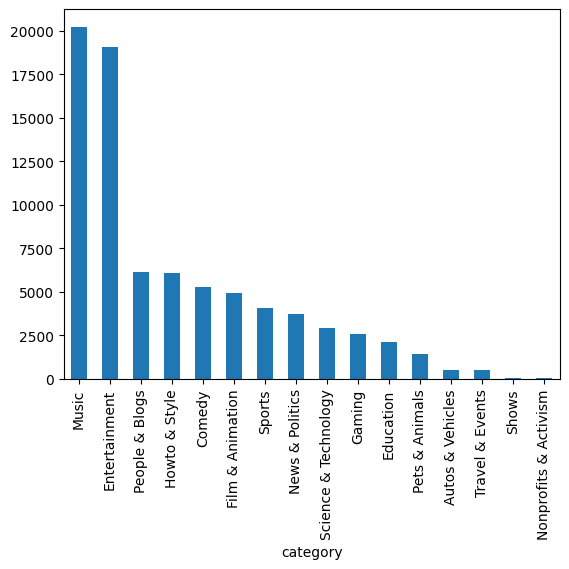

In [55]:
df_all['category'].value_counts().plot.bar()

In [56]:
df_all['category'].value_counts()

,count
category,
Music,20226
Entertainment,19088
People & Blogs,6136
Howto & Style,6074
Comedy,5285
Film & Animation,4922
Sports,4081
News & Politics,3712
Science & Technology,2919


In [57]:
gdat = df_all.groupby(by='category').mean()
gdat.describe()

TypeError: agg function failed [how->mean,dtype->object]

category_id ที่มียอดวิวมากที่สุด เรียงจากมากไปหาน้อย

In [ ]:
gdat.sort_values(by=['dislikes'], ascending=False)

เลือกข้อมูลก่อนเอาเข้าโมเดล K-Mean

In [58]:
select_dat = pd.DataFrame(data=df_all,columns=['views','likes','dislikes','comment_count', 'comments_disabled', 'ratings_disabled'])
select_dat

,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled
0,748374,57527,2966,15954,False,False
1,2418783,97185,6146,12703,False,False
2,3191434,146033,5339,8181,False,False
3,343168,10172,666,2146,False,False
4,2095731,132235,1989,17518,False,False
...,...,...,...,...,...,...
38911,25066952,268088,12783,9933,False,False
38912,1492219,61998,13781,24330,False,False
38913,29641412,394830,8892,19988,False,False
38914,14317515,151870,45875,26766,False,False


In [59]:
# แบ่ง cluster ด้วย K-means
from sklearn.cluster import KMeans
datcluster = KMeans(n_clusters=3, random_state=0).fit_predict(select_dat)
df_all['cluster_number'] = datcluster
df_all

,video_id,trending_date,title,channel_title,category,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Country,cluster_number
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,22,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,US,1
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,Entertainment,24,2017-11-13 07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",US,1
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,23,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,US,1
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,Entertainment,24,2017-11-13 11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,US,1
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,Entertainment,24,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,US,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38911,l884wKofd54,2018-06-14,Enrique Iglesias - MOVE TO MIAMI (Official Vid...,EnriqueIglesiasVEVO,Music,10,2018-05-09 07:00:01,"Enrique Iglesias feat. Pitbull|""MOVE TO MIAMI""...",25066952,268088,12783,9933,https://i.ytimg.com/vi/l884wKofd54/default.jpg,False,False,False,NEW SONG - MOVE TO MIAMI feat. Pitbull (Click ...,GB,1
38912,IP8k2xkhOdI,2018-06-14,Jacob Sartorius - Up With It (Official Music V...,Jacob Sartorius,Music,10,2018-05-11 17:09:16,"jacob sartorius|""jacob""|""up with it""|""jacob sa...",1492219,61998,13781,24330,https://i.ytimg.com/vi/IP8k2xkhOdI/default.jpg,False,False,False,THE OFFICIAL UP WITH IT MUSIC VIDEO!Get my new...,GB,1
38913,Il-an3K9pjg,2018-06-14,Anne-Marie - 2002 [Official Video],Anne-Marie,Music,10,2018-05-08 11:05:08,"anne|""marie""|""anne-marie""|""2002""|""two thousand...",29641412,394830,8892,19988,https://i.ytimg.com/vi/Il-an3K9pjg/default.jpg,False,False,False,Get 2002 by Anne-Marie HERE ▶ http://ad.gt/200...,GB,0
38914,-DRsfNObKIQ,2018-06-14,Eleni Foureira - Fuego - Cyprus - LIVE - First...,Eurovision Song Contest,Entertainment,24,2018-05-08 20:32:32,"Eurovision Song Contest|""2018""|""Lisbon""|""Cypru...",14317515,151870,45875,26766,https://i.ytimg.com/vi/-DRsfNObKIQ/default.jpg,False,False,False,Eleni Foureira represented Cyprus at the first...,GB,1


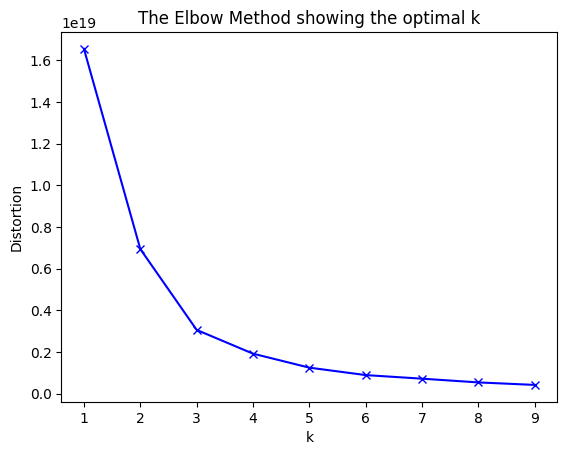

In [60]:
import matplotlib.pyplot as plt
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(select_dat)
    distortions.append(kmeanModel.inertia_)
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [61]:
df_all.groupby(by='cluster_number').mean()

TypeError: agg function failed [how->mean,dtype->object]

In [62]:
cluster2 = df_all[df_all['cluster_number']== 2]
cluster2.groupby(by='category').mean()


TypeError: agg function failed [how->mean,dtype->object]

In [ ]:
cluster2.groupby(by='Country').mean()

In [ ]:
tag2 = cluster2['tags']
tag2

In [ ]:
# importing all necessery modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

text = tag2.values

wordcloud = WordCloud().generate(str(text))

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [ ]:
cluster1 = df_all[df_all['cluster_number']== 1]
cluster1.groupby(by='category').mean()

title1 = cluster1['title']
title1

In [ ]:
# importing all necessery modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

text = title1.values

wordcloud = WordCloud().generate(str(text))

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [ ]:
description1 = cluster1['description']
description1

In [ ]:
# importing all necessery modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

text = description1.values

wordcloud = WordCloud().generate(str(text))

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

In [ ]:
cluster1['trending_date'] = pd.to_datetime(cluster1['trending_date'], errors='coerce', format='%y.%d.%m')
cluster1['publish_time'] = pd.to_datetime(cluster1['publish_time'], errors='coerce', format='%Y-%m-%dT%H:%M:%S.%fZ')

In [ ]:
import matplotlib.pyplot as plt

select_pd = cluster1[['publish_time','views']]
fig, ax = plt.subplots(figsize=(15,5))

# Use ax1 to plot publish_time
select_pd.groupby(['publish_time']).mean()['views'].plot(x='date', y='view', legend=False, ax=ax)
ax.set_title("Publish_time")
